In [497]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import pandas as pd
from xsvmlib.xsvmc import xSVMC
from sklearn.model_selection import train_test_split
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from matplotlib.colors import LinearSegmentedColormap

In [498]:
df_fake = pd.read_csv("data/Fake.csv")
df_true = pd.read_csv("data/True.csv")
df_fake["real"] = "F"
df_true["real"] = "T"

df_news_train = pd.read_csv("data/train.csv")
df_news_test = pd.read_csv("data/test.csv")

In [499]:
df_news = pd.concat([df_news_train, df_news_test])
ready_news = df_news.sample(frac=1)[:100]
ready_news.head()

,text,label
47938,Adu Propels United Freddy Adu scores on a defl...,1
88627,NO QUIT IN HOLYFIELD Why is he still doing thi...,1
81605,FDA Official Alleges Vioxx Report Obstruction ...,2
107268,Update 2: European Central Bank Keeps Rates St...,2
39136,US Airways asks court to impose 23 percent pay...,2


In [514]:
dataset = pd.concat([df_fake, df_true])
ready = dataset.sample(frac=1)[:3000]
ready.head()

,title,text,subject,date,real
7459,"Right-Wing Sheriff: We Don’t Need Rape Kits, ...","We definitely live in a rape culture, and one ...",News,"March 16, 2016",F
11968,BOOM! TRUMP Holds “DISHONEST MEDIA” Accountabl...,Kellyanne Conway met with NBC s Meet The Pres...,politics,"Jan 8, 2017",F
11596,"France's move to raise minimum food prices, li...","PARIS (Reuters) - France, the European Union s...",worldnews,"December 21, 2017",T
19431,MISLEADING MAINSTREAM MEDIA Is Pushing False N...,Here is Michigan elector Michael Banerian tell...,left-news,"Dec 18, 2016",F
1868,Russia Probe’s New Leader Disqualified Himsel...,With Devin Nunes recusal from the House Intel...,News,"April 6, 2017",F


In [515]:
sentences = ready["text"]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

X = ready["text"]
y = ready["real"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [516]:
sequences_train = tokenizer.texts_to_sequences(X_train)
ready_sequences_train = pad_sequences(sequences_train, padding="post")
pad_len = len(ready_sequences_train[0])
sequences_train = tokenizer.texts_to_sequences(X_test)
ready_sequences_test = pad_sequences(sequences_train, padding="post", maxlen=pad_len)

In [517]:
clf = xSVMC(kernel="linear", k=1)
clf.fit(ready_sequences_train, y_train)

In [ ]:
SVs = clf.support_vectors_

In [ ]:
def clean_data(text):
  text_list = text.split(" ")
  filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
  not_valid = [c for c in filters]
  res = []
  for palabra in text_list:
    if palabra != "" and palabra not in not_valid:
      res.append(palabra)
  return res

In [ ]:
# for pred in topK:
#   print(pred.class_name,
#   pred.eval.mu_hat.level,
#   SVs[pred.eval.mu_hat.misv_idx],
#   pred.eval.nu_hat.level,
#   SVs[pred.eval.nu_hat.misv_idx],
#   pred.eval.buoyancy)

In [ ]:
colormap = LinearSegmentedColormap.from_list('custom', 
                                       [(0, '#2610b3'),
                                        (1,   '#cc103c')], N=256)

def draw_text(draw_obj, text, pos_x, pos_y, prob_yes, prob_no, font):
  alpha = int(100 + prob_yes * 155)
  color = colormap(prob_no)[:3]
  draw_obj.text((pos_x, pos_y), text, fill=(int(color[0] * 255), int(color[1] * 255), int(color[2] * 255), alpha), font=font)

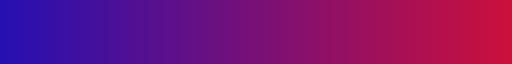

In [ ]:
colormap

In [ ]:
def create_img(l_text, prob_yes, prob_no, path):
  img_x = 1000
  img_y = 600
  offset_x = 10
  offset_y = 10

  img = Image.new(mode="RGBA", size=(img_x, img_y), color = (255, 255, 255))
  txt = Image.new('RGBA', img.size, (255,255,255,0))
  draw = ImageDraw.Draw(txt)
  font = ImageFont.truetype("fonts\SpaceMono-Bold.ttf", 16)

  last_pos_x = 0
  combined = 0
  pos_y = 0
  for i in range(len(l_text)):
    palabra = l_text[i]
    pos_x = (len(palabra) + 1) * 10
    if last_pos_x + pos_x + offset_x >= img_x:
      pos_y += 18
      last_pos_x = 0
    draw_text(draw, palabra, last_pos_x + offset_x, pos_y + offset_y, prob_yes[i], prob_no[i], font)
    last_pos_x += pos_x

  combined = Image.alpha_composite(img, txt)
  combined.save(path)

In [ ]:
def render_text(text, mu_misv, nu_misv, idx):
  texto = clean_data(text)
  values_yes = mu_misv
  max_yes = max(values_yes)
  prob_yes = (values_yes / max_yes)
  values_no = nu_misv
  max_no = max(values_no)
  prob_no = (values_no / max_no)
  create_img(texto, prob_yes, prob_no, "./output/out-%s.png" % idx)

In [ ]:
X_test.iloc[19]

'WASHINGTON (Reuters) - President Donald Trump said on Wednesday he would seek an investigation into what he believes was voter fraud in last  November’s election, despite an overwhelming consensus among state officials, election experts, and politicians that it is rare in the United States. The announcement drew rebukes from both Republicans and Democrats who said the Republican president’s unsubstantiated claims of large-scale fraud could undermine voting rights efforts as well as confidence in the new U.S. chief executive. In the Nov. 8 election, Trump lost the popular vote to Democrat Hillary Clinton by nearly 3 million ballots. Irked by that large figure, he has blamed voter fraud without citing evidence. “I will be asking for a major investigation into VOTER FRAUD, including those registered to vote in two states, those who are illegal and....even, those registered to vote who are dead (and many for a long time),” Trump said on Twitter. “Depending on results, we will strengthen u

In [ ]:
y_test.iloc[19]

'T'

In [ ]:
for i in range(10):
  test_ex = i
  topK = clf.predict_with_context(ready_sequences_test[test_ex])
  pred = topK[0]
  mu_misv = SVs[pred.eval.mu_hat.misv_idx]
  nu_misv = SVs[pred.eval.nu_hat.misv_idx]
  render_text(X_test.iloc[test_ex], mu_misv, nu_misv, test_ex)